#### Bagaev Dmitry

#### low-rank matrix homework

Generate random low-rank matrix 500×500 with rank r=10, perform its SVD and plot how decreases singular values

In [1]:
import numpy as np

def generate_low_rank_matrix(size, rank):
    matrix = np.zeros((size, size))

    for i in range(rank):
        vector_a = np.random.rand(size, 1)
        vector_b = np.random.rand(1, size)
        matrix += vector_a.dot(vector_b)

    return matrix

In [2]:
matrix_count = 5

x = []
y = []

for i in range(matrix_count):
    low_rank_matrix = generate_low_rank_matrix(500, 10)
    s = np.linalg.svd(low_rank_matrix, compute_uv=False)
    y.append(s[s>1e-11])
    x.append([i for i in range(len(y[i]))])


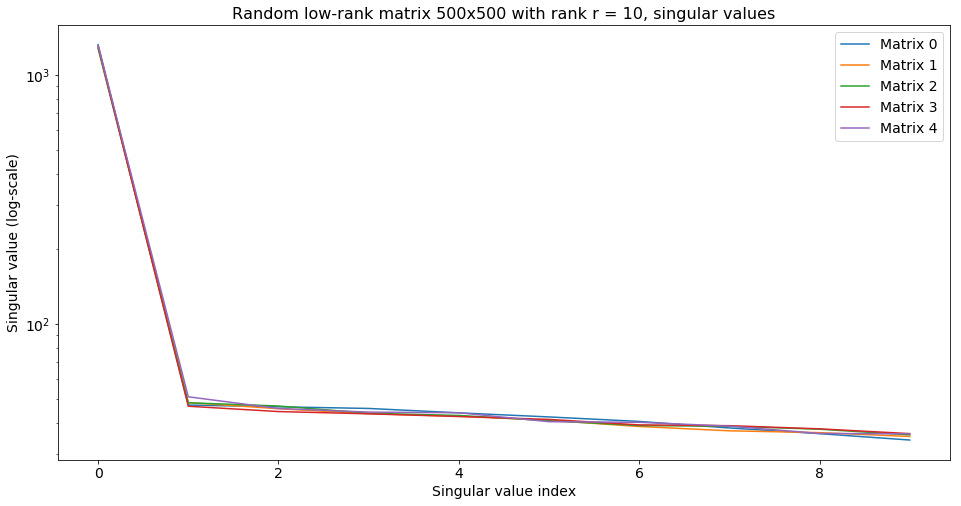

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

plt.figure(figsize=(16, 8))
plt.title("Random low-rank matrix 500x500 with rank r = 10, singular values", fontsize=16)

for i in range(matrix_count):
    plt.plot(x[i], y[i], label="Matrix " + str(i))
             
plt.legend(loc="best", fontsize=14)

plt.xlabel('Singular value index', fontsize=14)
plt.xticks(fontsize=14)

plt.ylabel('Singular value (log-scale)', fontsize=14)
plt.yscale('log')
_ = plt.yticks(fontsize=14)

In [15]:
from scipy import linalg

def usv_multiply(u, s, v, vector):
    return u.dot(s * v.dot(vector))

def general_multiply(matrix, vector):
    return matrix.dot(vector)


matrix_sizes = [ int(1.4 ** i) for i in range(10, 27) ]
rank = 2
print("Matrix sizes", matrix_sizes)

general_results = []
time_usv_results = []

for size in matrix_sizes:
    low_rank_matrix = generate_low_rank_matrix(size, rank)
    vector = np.random.rand(size)
    
    time_general_result = %timeit -n2 -o -q general_multiply(low_rank_matrix, vector)
    
    (u, s, v) = linalg.svd(low_rank_matrix, full_matrices=False, check_finite=False, overwrite_a=True)
    time_usv_result = %timeit -n2 -o -q usv_multiply(u, s, v, vector)
    
    general_results.append(time_general_result.best)
    time_usv_results.append(time_usv_result.best)
    print("Completed timeit for size", size)

print("Completed timeit")


Matrix sizes [28, 40, 56, 79, 111, 155, 217, 304, 426, 597, 836, 1171, 1639, 2295, 3214, 4499, 6299]
Completed timeit for size 28
Completed timeit for size 40
Completed timeit for size 56
Completed timeit for size 79
Completed timeit for size 111
Completed timeit for size 155
Completed timeit for size 217
Completed timeit for size 304
Completed timeit for size 426
Completed timeit for size 597
Completed timeit for size 836
Completed timeit for size 1171
Completed timeit for size 1639
Completed timeit for size 2295
Completed timeit for size 3214
Completed timeit for size 4499
Completed timeit for size 6299
Completed timeit


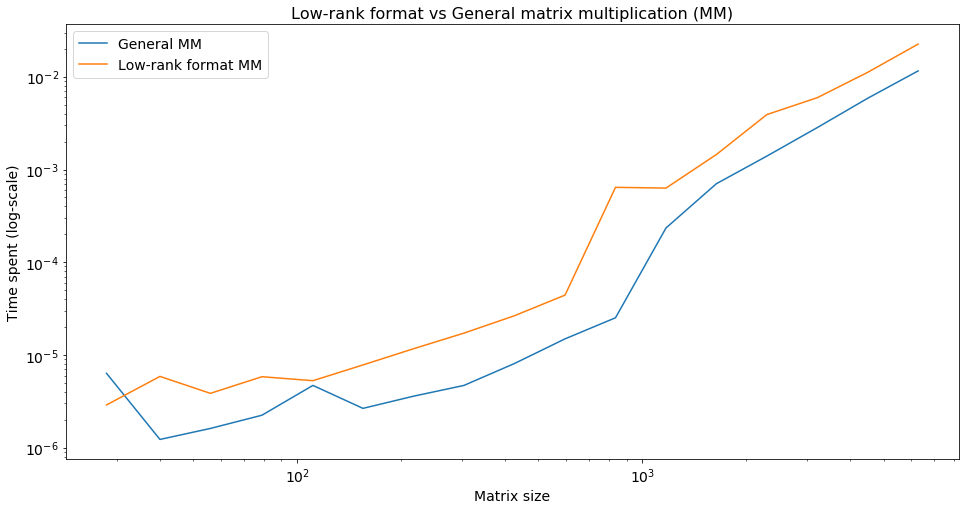

In [16]:
plt.figure(figsize=(16, 8))
plt.title("Low-rank format vs General matrix multiplication (MM)", fontsize=16)

plt.plot(matrix_sizes, general_results, label = "General MM")
plt.plot(matrix_sizes, time_usv_results, label = "Low-rank format MM")

plt.legend(loc="best", fontsize=14)

plt.xlabel('Matrix size', fontsize=14)
plt.xscale('log')
plt.xticks(fontsize=14)

plt.yscale('log')
plt.ylabel('Time spent (log-scale)', fontsize=14)
_ = plt.yticks(fontsize=14)